In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

## Lectura de CSVs, NaN y listas de DF

In [411]:
# Variable para controlar num filas a leer, None = Todas
rows_to_read = None

ACS = pd.read_csv('./Datasets/ACS Historical Data.csv', nrows=rows_to_read)[::-1]
ACX = pd.read_csv('./Datasets/ACX Historical Data.csv',nrows=rows_to_read)[::-1]
AENA = pd.read_csv('./Datasets/AENA Historical Data.csv', nrows=rows_to_read)[::-1]
ALM = pd.read_csv('./Datasets/ALM Historical Data.csv', nrows=rows_to_read)[::-1]
AMA = pd.read_csv('./Datasets/AMA Historical Data.csv', nrows=rows_to_read)[::-1]
ANA = pd.read_csv('./Datasets/ANA Historical Data.csv',nrows=rows_to_read)[::-1]

BBVA = pd.read_csv('./Datasets/BBVA Historical Data.csv', nrows=rows_to_read)[::-1]
BKIA = pd.read_csv('./Datasets/BKIA Historical Data.csv', nrows=rows_to_read)[::-1]
BKT = pd.read_csv('./Datasets/BKT Historical Data.csv', nrows=rows_to_read)[::-1]
CABK = pd.read_csv('./Datasets/CABK Historical Data.csv', nrows=rows_to_read)[::-1]
CIEA = pd.read_csv('./Datasets/CIEA Historical Data.csv', nrows=rows_to_read)[::-1]
CLNX = pd.read_csv('./Datasets/CLNX Historical Data.csv', nrows=rows_to_read)[::-1]
COL = pd.read_csv('./Datasets/COL Historical Data.csv', nrows=rows_to_read)[::-1]
ELE = pd.read_csv('./Datasets/ELE Historical Data.csv', nrows=rows_to_read)[::-1]
ENAG = pd.read_csv('./Datasets/ENAG Historical Data.csv', nrows=rows_to_read)[::-1]


FER = pd.read_csv('./Datasets/FER Historical Data.csv', nrows=rows_to_read)[::-1]
GRLS = pd.read_csv('./Datasets/GRLS Historical Data.csv', nrows=rows_to_read)[::-1]
IBE = pd.read_csv('./Datasets/IBE Historical Data.csv', nrows=rows_to_read)[::-1]
IBEX_5y = pd.read_csv('./Datasets/IBEX_5y.csv', nrows=rows_to_read)[::-1]
ICAG = pd.read_csv('./Datasets/ICAG Historical Data.csv', nrows=rows_to_read)[::-1]
IDR = pd.read_csv('./Datasets/IDR Historical Data.csv', nrows=rows_to_read)[::-1]
ITX = pd.read_csv('./Datasets/ITX Historical Data.csv', nrows=rows_to_read)[::-1]
MAP = pd.read_csv('./Datasets/MAP Historical Data.csv', nrows=rows_to_read)[::-1]
MEL = pd.read_csv('./Datasets/MEL Historical Data.csv', nrows=rows_to_read)[::-1]
MRL = pd.read_csv('./Datasets/MRL Historical Data.csv', nrows=rows_to_read)[::-1]
MTS = pd.read_csv('./Datasets/MTS Historical Data.csv', nrows=rows_to_read)[::-1]
NTGY = pd.read_csv('./Datasets/NTGY Historical Data.csv', nrows=rows_to_read)[::-1]
PHMR = pd.read_csv('./Datasets/PHMR Historical Data.csv', nrows=rows_to_read)[::-1]
REE = pd.read_csv('./Datasets/REE Historical Data.csv', nrows=rows_to_read)[::-1]
REP = pd.read_csv('./Datasets/REP Historical Data.csv', nrows=rows_to_read)[::-1]
SABE = pd.read_csv('./Datasets/SABE Historical Data.csv', nrows=rows_to_read)[::-1]
SAN = pd.read_csv('./Datasets/SAN Historical Data.csv', nrows=rows_to_read)[::-1]
SGREN = pd.read_csv('./Datasets/SGREN Historical Data.csv', nrows=rows_to_read)[::-1]
SLRS = pd.read_csv('./Datasets/SLRS Historical Data.csv', nrows=rows_to_read)[::-1]
TEF = pd.read_csv('./Datasets/TEF Historical Data.csv', nrows=rows_to_read)[::-1]
VIS = pd.read_csv('./Datasets/VIS Historical Data.csv', nrows=rows_to_read)[::-1]


my_comp = [ACS,
           ACX,
           AENA,
           ALM,
           AMA,
           ANA,
           BBVA,
           BKIA,
           BKT,
           CABK,
           CIEA,
           CLNX,
           COL,
           ELE,
           ENAG,FER, GRLS, IBE,ICAG, IDR, ITX, MAP, MEL, MRL, MTS,
           NTGY, PHMR, REE, REP, SABE, SAN, SGREN, SLRS, TEF, VIS

]
my_comp_names = ['ACS', 'ACX', 'AENA', 'ALM', 'AMA', 'ANA', 'BBVA', 'BKIA', 'BKT',
                 'CABK','CIEA','CLNX','COL','ELE','ENAG', 'FER', 'GRLS', 'IBE',
                 'ICAG', 'IDR', 'ITX', 'MAP', 'MEL', 'MRL', 'MTS', 'NTGY', 'PHMR',
                 'REE', 'REP', 'SABE', 'SAN', 'SGREN', 'SLRS', 'TEF', 'VIS'
]

# Comprobar que el numero de dataframes es correcto:
print('Dataframes listos:', len(my_comp))
print('Dataframes nombrados:', len(my_comp_names))

Dataframes listos: 35
Dataframes nombrados: 35


#### Búsqueda de fechas missing

In [412]:
# Creo df con los dates de todos
df_dates = pd.DataFrame()
for idx,company in enumerate(my_comp_names):
    df_dates[company] = my_comp[idx].Date
print(df_dates.shape)
df_dates.head()

(1278, 35)


,ACS,ACX,AENA,ALM,AMA,ANA,BBVA,BKIA,BKT,CABK,...,NTGY,PHMR,REE,REP,SABE,SAN,SGREN,SLRS,TEF,VIS
1277,"Jan 02, 2015","Jan 02, 2015",NaN,"Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015",...,"Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015"
1276,"Jan 05, 2015","Jan 05, 2015",NaN,"Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015",...,"Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015"
1275,"Jan 06, 2015","Jan 06, 2015",NaN,"Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015",...,"Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015"
1274,"Jan 07, 2015","Jan 07, 2015",NaN,"Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015",...,"Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015"
1273,"Jan 08, 2015","Jan 08, 2015",NaN,"Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015",...,"Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015"


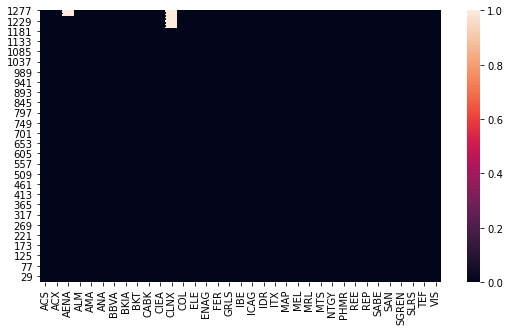

In [413]:
plt.figure(figsize=(9,5))

sns.heatmap(df_dates.isnull());

In [414]:
# Imprime las filas con nulls
df_dates[df_dates.isna().any(axis=1)]

,ACS,ACX,AENA,ALM,AMA,ANA,BBVA,BKIA,BKT,CABK,...,NTGY,PHMR,REE,REP,SABE,SAN,SGREN,SLRS,TEF,VIS
1277,"Jan 02, 2015","Jan 02, 2015",NaN,"Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015",...,"Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015","Jan 02, 2015"
1276,"Jan 05, 2015","Jan 05, 2015",NaN,"Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015",...,"Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015","Jan 05, 2015"
1275,"Jan 06, 2015","Jan 06, 2015",NaN,"Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015",...,"Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015","Jan 06, 2015"
1274,"Jan 07, 2015","Jan 07, 2015",NaN,"Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015",...,"Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015","Jan 07, 2015"
1273,"Jan 08, 2015","Jan 08, 2015",NaN,"Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015",...,"Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015","Jan 08, 2015"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015",...,"Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015","Apr 30, 2015"
1194,"May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015",...,"May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015","May 04, 2015"
1193,"May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015",...,"May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015","May 05, 2015"
1192,"May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015",...,"May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015","May 06, 2015"


In [415]:
# Porcentaje que representan los nulls
df_dates.isnull().sum() / df_dates.shape[0] * 100.00

ACS      0.000000
ACX      0.000000
AENA     2.269171
ALM      0.000000
AMA      0.000000
ANA      0.000000
BBVA     0.000000
BKIA     0.000000
BKT      0.000000
CABK     0.000000
CIEA     0.000000
CLNX     6.807512
COL      0.000000
ELE      0.000000
ENAG     0.000000
FER      0.000000
GRLS     0.000000
IBE      0.000000
ICAG     0.000000
IDR      0.000000
ITX      0.000000
MAP      0.000000
MEL      0.000000
MRL      0.000000
MTS      0.000000
NTGY     0.000000
PHMR     0.000000
REE      0.000000
REP      0.000000
SABE     0.000000
SAN      0.000000
SGREN    0.000000
SLRS     0.000000
TEF      0.000000
VIS      0.000000
dtype: float64

In [416]:
# Columnas con nulls
df_dates.columns[df_dates.isna().any(axis=0)]

Index(['AENA', 'CLNX'], dtype='object')

In [417]:
# Cuantos nulls por columna
df_dates.isna().sum()

ACS       0
ACX       0
AENA     29
ALM       0
AMA       0
ANA       0
BBVA      0
BKIA      0
BKT       0
CABK      0
CIEA      0
CLNX     87
COL       0
ELE       0
ENAG      0
FER       0
GRLS      0
IBE       0
ICAG      0
IDR       0
ITX       0
MAP       0
MEL       0
MRL       0
MTS       0
NTGY      0
PHMR      0
REE       0
REP       0
SABE      0
SAN       0
SGREN     0
SLRS      0
TEF       0
VIS       0
dtype: int64

In [418]:
# Elimino los 87 primeros elementos de todos los df con cuidado para eliminar menos de los que tienen NaNs
for c in my_comp:
    if c.shape[0] != 1278:
        d = c.shape[0] - 1191
        c.drop(labels=c.index[:d], inplace=True, axis=0)
    else:
        c.drop(labels=c.index[:87], inplace=True, axis=0)

In [419]:
AENA.shape

(1191, 7)

In [420]:
# Cambia los indices por la columna Date en todos los datasets
for c in my_comp:
    c['Date'] = pd.to_datetime(c['Date'])
    c.set_index('Date', inplace=True)

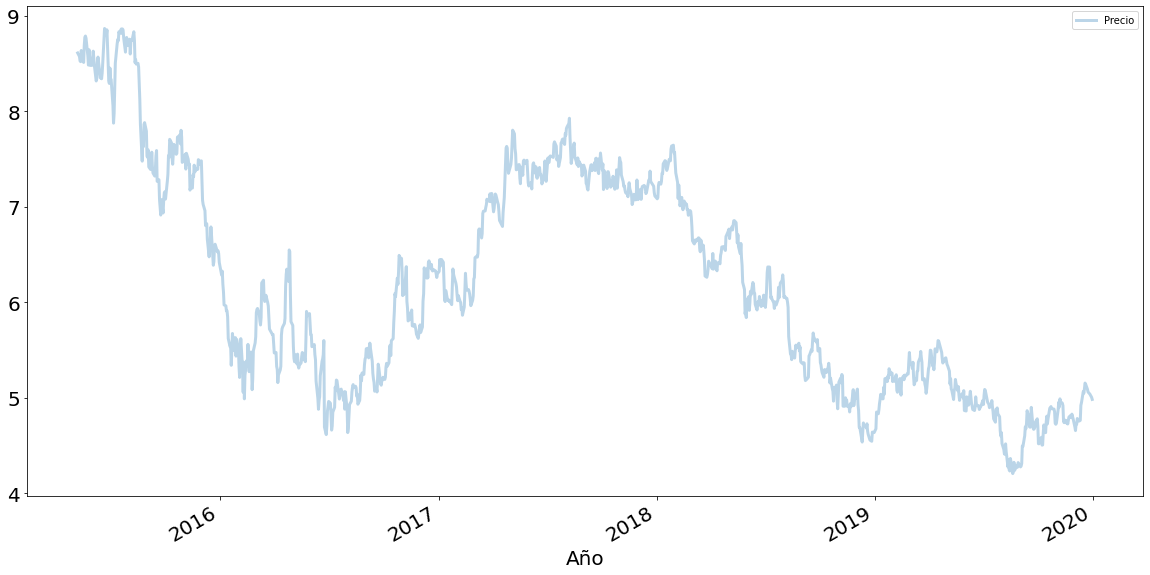

In [421]:
# Plot de una de las empresas, ahora que está preparado el dataframe
BBVA['Price'].plot(figsize=(20,10), linewidth=3, fontsize=20, alpha=0.3, label='Precio');
plt.xlabel('Año', fontsize=20);
plt.legend();

In [422]:
# Candleplot una de las empresas, ahora que está preparado el dataframe

fig = go.Figure(data=[go.Candlestick(x=BBVA.index,
                open=BBVA['Open'],
                high=BBVA['High'],
                low=BBVA['Low'],
                close=BBVA['Price'])])
fig.show()

## Análisis por Precio

### Estacionalidad y Tendencia

Cálculo de la **autocorrelación** para todas las empresas, para todos los valores 0-365 mostrando por pantalla aquellos con correlación superior a .6. Esto no ha sido utilizado finalmente.

In [424]:
# Primero estudio su autocorrelacion buscando algun tipo de estacionalidad

# Detecta series con alguna autocorrelacion en shifts 0-365
min_lecturas = 30

for idx,comp in enumerate(my_comp):
    corr_array = pacf(comp['Price'], nlags=365)
    if any(corr_array[min_lecturas:] > .6):
        print(f'{my_comp_names[idx]}')
        for shift, corr in enumerate(corr_array):
            if corr > .6 and shift >= min_lecturas:
                print(f'Shift {shift}, correlacion {corr}')


C:\Users\diego\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



AMA
Shift 301, correlacion 0.8300764033758323
Shift 315, correlacion 0.7442353091078239
Shift 316, correlacion 2.4166863855900718
Shift 318, correlacion 9.592963572917766
Shift 322, correlacion 0.7711157807511644
Shift 326, correlacion 0.6986862060637533
Shift 329, correlacion 0.88531293452459
Shift 331, correlacion 3.5455902979666987
Shift 336, correlacion 8.493278477633234
Shift 337, correlacion 0.9400723416686936
BKT
Shift 364, correlacion 0.7725935000756954
CIEA
Shift 358, correlacion 1.1317045103876506
COL
Shift 277, correlacion 1.1337326226468465
Shift 278, correlacion 5.895710343972985
Shift 281, correlacion 0.8768832459019834
IDR
Shift 361, correlacion 3.363680733271559
Shift 362, correlacion 1.42511339473731
MTS
Shift 259, correlacion 0.641393698014112
Shift 262, correlacion 1.1342405590674491
Shift 263, correlacion 2.6808410408575427
Shift 322, correlacion 0.6814670545051834
Shift 335, correlacion 1.1064184274533264
Shift 338, correlacion 1.3163685753495622
Shift 347, correla

Investigo una de las graficas que devuelve valores para la autocorrelación >1 y resulta que por las ecuaciones que
utiliza por debajo la función, los datos tienen que ser de una serie temporal estacionaria.

Fuente:
https://www.mathworks.com/matlabcentral/answers/122337-wrong-function-partial-autocorrelation-pacf-parcorr-greater-than-1-1


C:\Users\diego\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



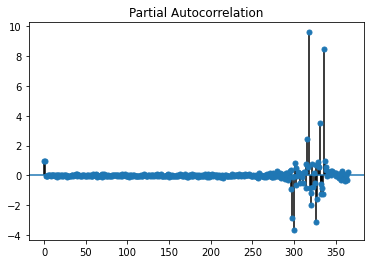

In [426]:
plot_pacf(AMA['Price'], lags=365);

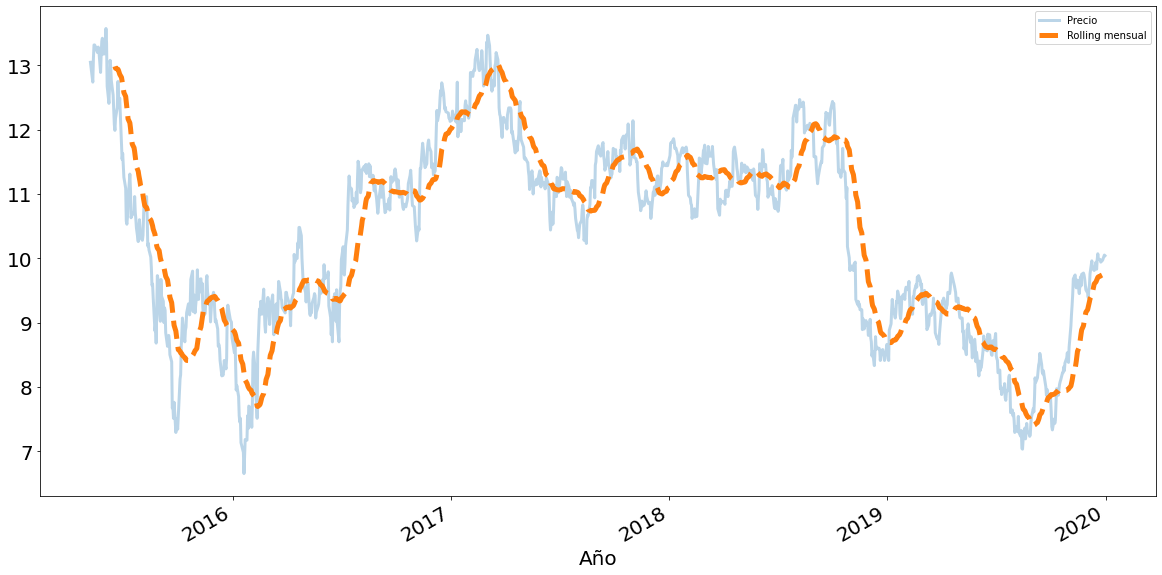

In [477]:
# Se añaden nuevas columnas y se pasa a buscar la tendencia
for idx, comp in enumerate(my_comp):
    
    # Relleno columnas con tendencia
    comp['Price_roll365'] = comp['Price'].rolling(365).mean()
    comp['Price_roll30'] = comp['Price'].rolling(30).mean()
    
    # Relleno columnas con el precio normalizado minmax 100% = precio inicial
    comp['PriceN'] = comp['Price']/comp.iloc[0]['Price']*100
    
    # Relleno columna con el return
    comp['Return'] = comp['Price'].pct_change()
    
    # Relleno columna con dia de la semana
    comp['Dia de la semana'] = comp.index.dayofweek
    
    
    # Dibujo algunas gráficas para visualizar los datos
    # Dibujo las que se corresponden con idx 1, 7, 12
    if idx in [1, 7, 12]:
        comp['Price'].plot(figsize=(20,10), linewidth=3, fontsize=20, alpha=0.3, label='Precio')
        comp['Price'].rolling(365).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,
                                               linestyle='--', label='Rolling anual')
        comp['Price'].rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,
                                               linestyle='--', label='Rolling mensual')
        #comp.resample('W')['Price'].mean().plot(figsize=(20,10), marker='o', markersize=8,
                                                #linewidth=2, fontsize=20, label='Downsample weeks')
    #comp.resample('M')['Price'].mean().plot(figsize=(20,10), marker='o', markersize=8,
     #                                       linewidth=2, fontsize=20, label='Downsample')
        plt.xlabel('Año', fontsize=20);
        plt.legend();
    else:
        pass

### Uso de Return

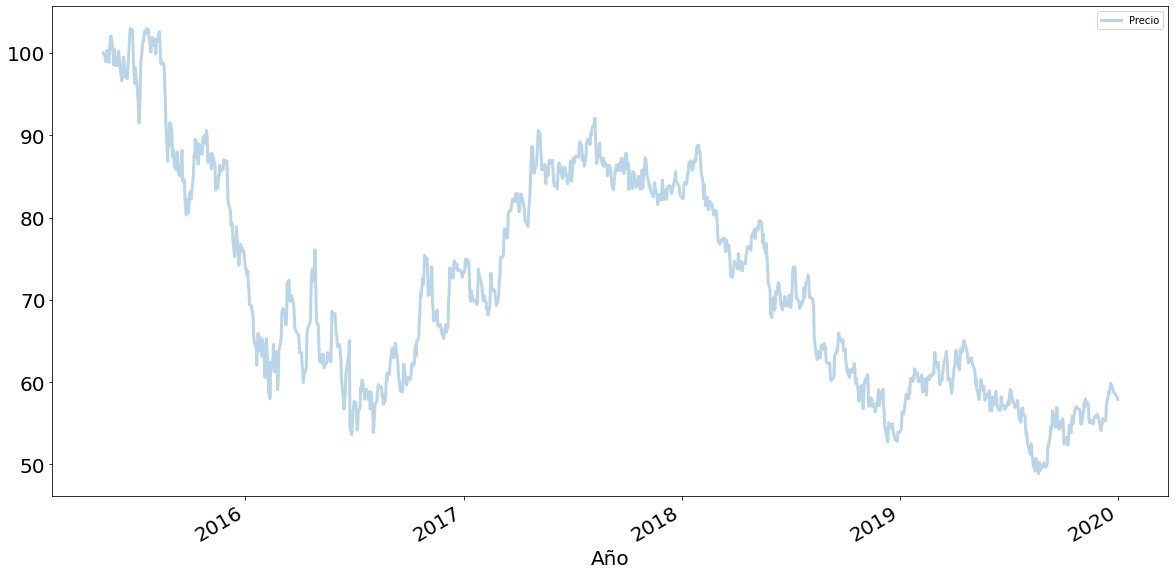

In [314]:
BBVA['PriceN'].plot(figsize=(20,10), linewidth=3, fontsize=20, alpha=0.3, label='Precio');
plt.xlabel('Año', fontsize=20);
plt.legend();

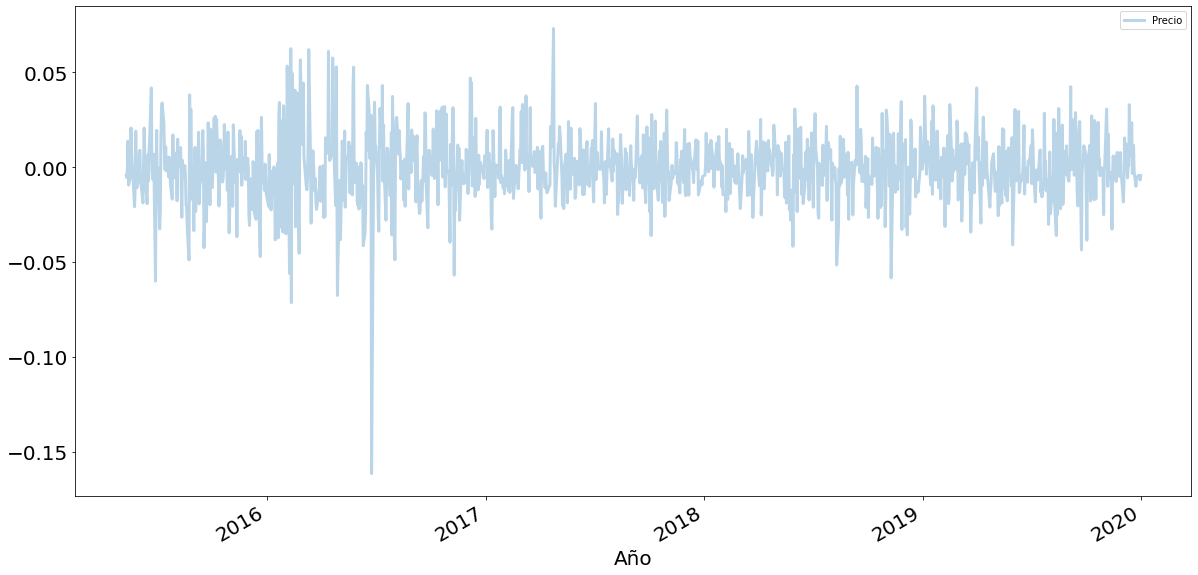

In [315]:
BBVA['Return'].plot(figsize=(20,10), linewidth=3, fontsize=20, alpha=0.3, label='Precio');
plt.xlabel('Año', fontsize=20);
plt.legend();

In [428]:
# Se crea una matriz para guardar las correlaciones

t = len(my_comp_names)
dist_inter_emp = np.zeros((t,t))
dist_inter_emp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [429]:
for k1,v1 in enumerate(my_comp):
    for k2,v2 in enumerate(my_comp):
        dist_inter_emp[k1, k2] = v1['PriceN'].corr(v2['PriceN'])

# Crea el df con la matriz de correlaciones y filas, columnas = nombre empresas
df_distancias_price = pd.DataFrame(dist_inter_emp, columns=my_comp_names, index=my_comp_names)

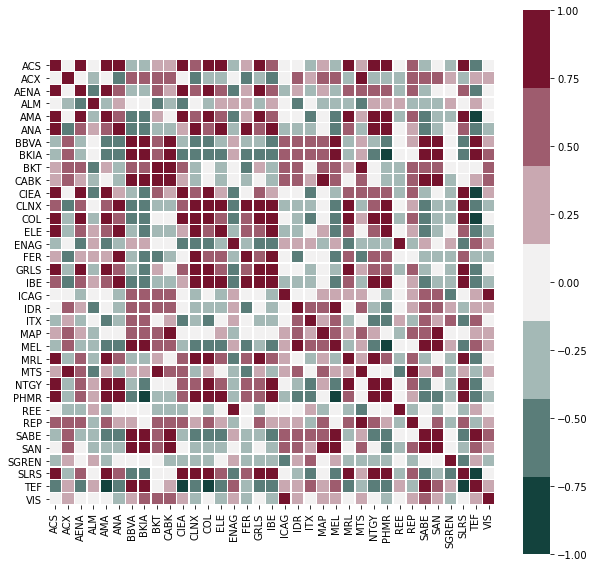

In [430]:
plt.figure(figsize=(10,10))
sns.heatmap(df_distancias_price,
            #cmap="vlag",
            cmap=sns.diverging_palette(180, 3, s=85, l=25, n=7),
            annot=False, linewidths=.5,
           square=True, vmin=-1.0, vmax=1.0);
#plt.savefig('heatmap_PriceN.png')

In [431]:
# Despues de las correlaciones con PriceN mostrar las que son con Return
for k1,v1 in enumerate(my_comp):
    for k2,v2 in enumerate(my_comp):
        dist_inter_emp[k1, k2] = v1['Return'].corr(v2['Return'])

# Crea el df con la matriz de correlaciones y filas, columnas = nombre empresas
df_distancias_return = pd.DataFrame(dist_inter_emp, columns=my_comp_names, index=my_comp_names)

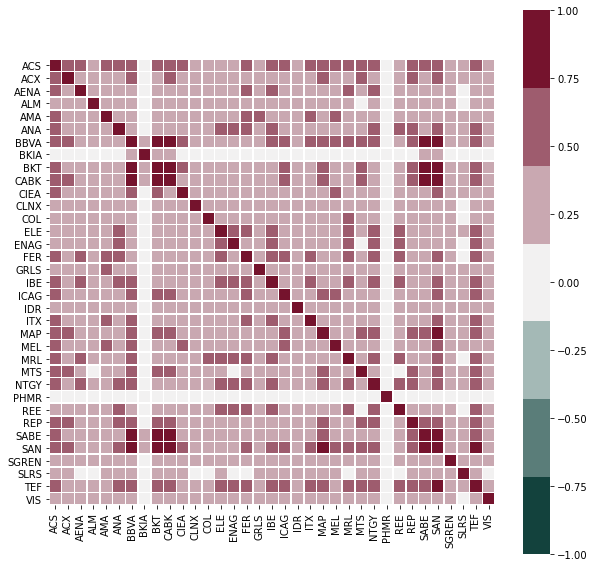

In [432]:
plt.figure(figsize=(10,10))
sns.heatmap(df_distancias_return,
            #cmap="vlag",
            cmap=sns.diverging_palette(180, 3, s=85, l=25, n=7),
            annot=False, linewidths=.5,
           square=True, vmin=-1.0, vmax=1.0);

#plt.savefig('heatmap_Return.png')

#### Crear los grupos

In [435]:
# Diccionario K la empresa y V con las que tenga mayor corr
correlacion_umbral = .7

dict_corr = dict()
for idx, comp_row in enumerate(df_distancias_return):
    #print(df_distancias_return.iloc[idx:])
    for col, comp_col in enumerate(df_distancias_return):
        #print(df_distancias_return.iloc[idx, col])
        # Si hay cierta correlación y no se está en la diagonal se aniade
        if df_distancias_return.iloc[idx, col] > correlacion_umbral and idx!=col:
            dict_corr.setdefault(comp_row, []).append((comp_col, df_distancias_return.iloc[idx, col]))
print(dict_corr)

{'BBVA': [('BKT', 0.7309800306015242), ('CABK', 0.7653250542723763), ('SABE', 0.7220371171681959), ('SAN', 0.8737425836694971)], 'BKT': [('BBVA', 0.7309800306015242), ('CABK', 0.7513811954147619), ('SABE', 0.7381393867454976), ('SAN', 0.7636207836880499)], 'CABK': [('BBVA', 0.7653250542723763), ('BKT', 0.7513811954147619), ('SABE', 0.8025725500694534), ('SAN', 0.7875760832961096)], 'ENAG': [('REE', 0.7028475247300809)], 'MAP': [('SAN', 0.7155437217509922)], 'REE': [('ENAG', 0.7028475247300809)], 'SABE': [('BBVA', 0.7220371171681959), ('BKT', 0.7381393867454976), ('CABK', 0.8025725500694534), ('SAN', 0.7551059744237465)], 'SAN': [('BBVA', 0.8737425836694971), ('BKT', 0.7636207836880499), ('CABK', 0.7875760832961096), ('MAP', 0.7155437217509922), ('SABE', 0.7551059744237464), ('TEF', 0.7403455450197802)], 'TEF': [('SAN', 0.7403455450197803)]}


In [436]:
# Numero de empresas relacionadas con otras
print(len(dict_corr))


9


In [439]:
# Se crea un diccionario con los grupos en dict_grupos
# despues se elimina la redundacia en una lista list_grupos_separados

dict_grupos = dict()
cont = 1
for k in dict_corr:
    dict_grupos['GRUPO' + str(cont)] = set(map(lambda a:a[0], dict_corr[k]))
    dict_grupos['GRUPO' + str(cont)].add(k)
    cont+=1
print(dict_grupos)

list_grupos_separados = list()
for g in dict_grupos.values():
    if g not in list_grupos_separados:
        list_grupos_separados.append(g)
            
print('----')
print('Grupos distintos encontrados:', len(list_grupos_separados))
print('Los grupos son:\n')
print(list_grupos_separados)

{'GRUPO1': {'SABE', 'CABK', 'BKT', 'BBVA', 'SAN'}, 'GRUPO2': {'SABE', 'CABK', 'BKT', 'BBVA', 'SAN'}, 'GRUPO3': {'SABE', 'CABK', 'BKT', 'BBVA', 'SAN'}, 'GRUPO4': {'ENAG', 'REE'}, 'GRUPO5': {'MAP', 'SAN'}, 'GRUPO6': {'ENAG', 'REE'}, 'GRUPO7': {'SABE', 'CABK', 'BKT', 'BBVA', 'SAN'}, 'GRUPO8': {'MAP', 'SABE', 'CABK', 'BKT', 'TEF', 'BBVA', 'SAN'}, 'GRUPO9': {'TEF', 'SAN'}}
----
Grupos distintos encontrados: 5
Los grupos son:

[{'SABE', 'CABK', 'BKT', 'BBVA', 'SAN'}, {'ENAG', 'REE'}, {'MAP', 'SAN'}, {'MAP', 'SABE', 'CABK', 'BKT', 'TEF', 'BBVA', 'SAN'}, {'TEF', 'SAN'}]


df_dates = pd.DataFrame()
for idx,company in enumerate(my_comp_names):
    df_dates[company] = my_comp[idx].Date
print(df_dates.shape)
df_dates.head()

#### Algunos datos sobre el ibex en general

In [440]:
ibex = pd.read_csv('./Datasets/ibex_5y.csv', nrows=rows_to_read)[::-1]


In [441]:
# 1. Que dia de la semana hay mas volumen de ventas?

ibex['Date'] = pd.to_datetime(ibex['Date'])
ibex.set_index('Date', inplace=True)
ibex['Dia de la semana'] = ibex.index.dayofweek


In [442]:
# Cambio el tipo de datos a numérico

for c in ['Price', 'Open', 'High', 'Low']:
    ibex[c] = ibex[c].str.replace(',','').astype(np.float64)

In [443]:
ibex['Mes'] = ibex.index.month

In [444]:
ibex.head()

,Price,Open,High,Low,Vol.,Change %,Dia de la semana,Mes
Date,,,,,,,,
2015-01-02,10350.8,10386.7,10440.3,10232.3,220.24M,0.69%,4,1
2015-01-05,9993.3,10267.2,10390.8,9977.8,299.61M,-3.45%,0,1
2015-01-06,9871.1,10040.7,10060.8,9871.1,282.86M,-1.22%,1,1
2015-01-07,9891.4,9937.3,10051.2,9836.4,290.12M,0.21%,2,1
2015-01-08,10115.0,10053.2,10143.0,9970.3,320.45M,2.26%,3,1


In [447]:
ibex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2015-01-02 to 2019-12-31
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1279 non-null   float64
 1   Open              1279 non-null   float64
 2   High              1279 non-null   float64
 3   Low               1279 non-null   float64
 4   Vol.              1279 non-null   object 
 5   Change %          1279 non-null   object 
 6   Dia de la semana  1279 non-null   int64  
 7   Mes               1279 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 89.9+ KB


Columnas con nulls:  Index([], dtype='object')


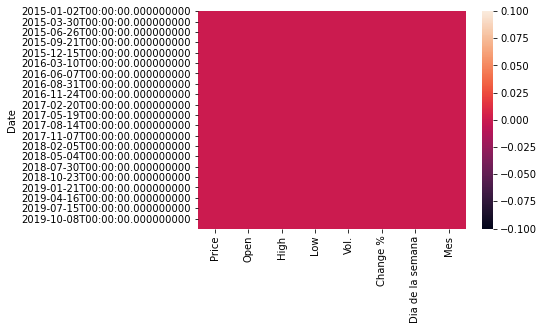

In [457]:
sns.heatmap(ibex.isnull())
print('Columnas con nulls: ',ibex.columns[ibex.isna().any(axis=0)])

Parece que no hay nulls, sin embargo el elemento 2016-01-10 para el Volumen tiene un valor no válido.

In [458]:
# Pero OJO
ibex['Vol.'].iloc[:265]

Date
2015-01-02    220.24M
2015-01-05    299.61M
2015-01-06    282.86M
2015-01-07    290.12M
2015-01-08    320.45M
               ...   
2016-01-08    310.72M
2016-01-10          -
2016-01-11    301.41M
2016-01-12    297.58M
2016-01-13    300.80M
Name: Vol., Length: 265, dtype: object

In [459]:
# Se elimina para poder convertirlo a numérico
ibex.drop(np.datetime64('2016-01-10'), axis=0, inplace=True)
ibex['Vol.'] = ibex['Vol.'].str[:-1].astype(np.float64)

#### Precio por dia de la semana

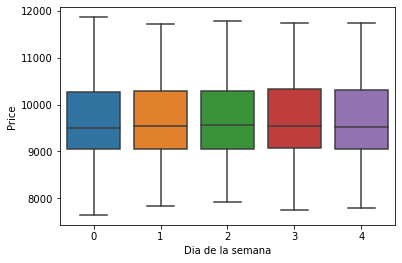

In [460]:
sns.boxplot(x=ibex['Dia de la semana'],
            y=ibex['Price']);

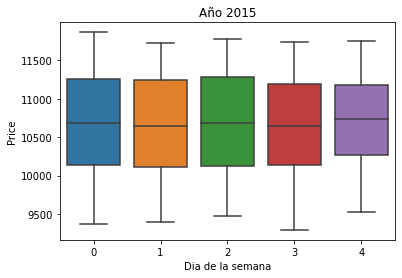

In [461]:
sns.boxplot(x=ibex['2015']['Dia de la semana'],
            y=ibex['2015']['Price']);
plt.title('Año 2015');

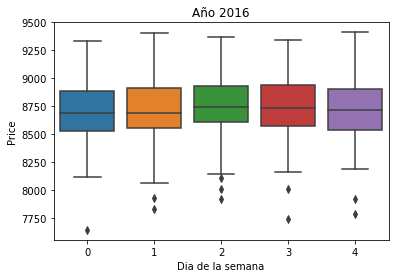

In [462]:
sns.boxplot(x=ibex['2016']['Dia de la semana'],
            y=ibex['2016']['Price']);
plt.title('Año 2016');

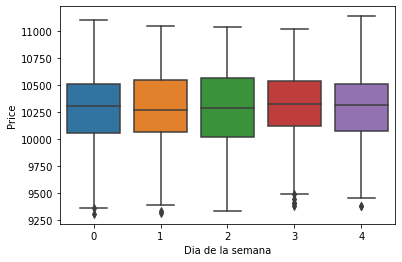

In [463]:
sns.boxplot(x=ibex['2017']['Dia de la semana'],
            y=ibex['2017']['Price']);

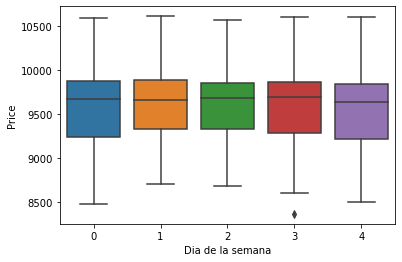

In [464]:
sns.boxplot(x=ibex['2018']['Dia de la semana'],
            y=ibex['2018']['Price']);

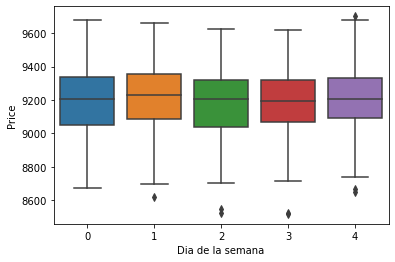

In [465]:
sns.boxplot(x=ibex['2019']['Dia de la semana'],
            y=ibex['2019']['Price']);

In [466]:
fig = go.Figure(data=[go.Candlestick(x=ibex['2015'].index,
                open=ibex['2015']['Open'],
                high=ibex['2015']['High'],
                low=ibex['2015']['Low'],
                close=ibex['2015']['Price'])],
                layout =dict(title=dict(text="Evolución IBEX35 año 2015")))

fig.show()

In [467]:
fig = go.Figure(data=[go.Candlestick(x=ibex['2016'].index,
                open=ibex['2016']['Open'],
                high=ibex['2016']['High'],
                low=ibex['2016']['Low'],
                close=ibex['2016']['Price'])],
                layout =dict(title=dict(text="Evolución IBEX35 año 2016")))

fig.show()

#### Meses con volumen

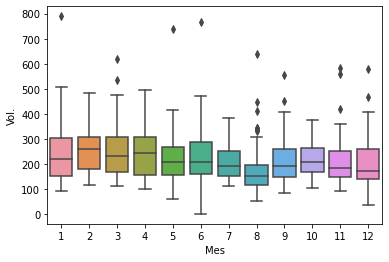

In [468]:
sns.boxplot(x=ibex['Mes'],
            y=ibex['Vol.']);

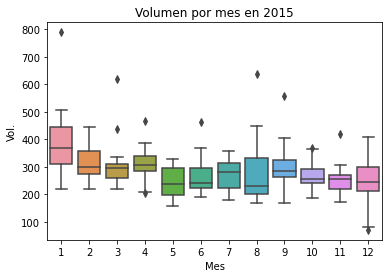

In [469]:
sns.boxplot(x=ibex['2015']['Mes'],
            y=ibex['2015']['Vol.'])
plt.title('Volumen por mes en 2015');

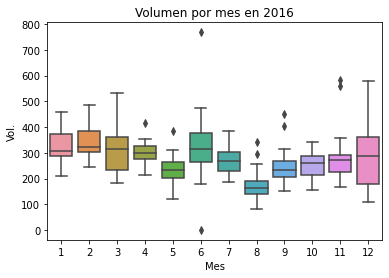

In [470]:
sns.boxplot(x=ibex['2016']['Mes'],
            y=ibex['2016']['Vol.'])
plt.title('Volumen por mes en 2016');

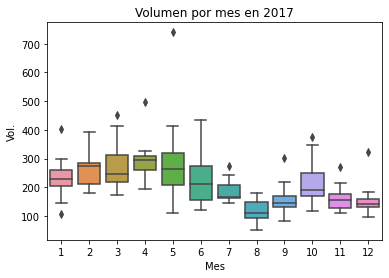

In [471]:
sns.boxplot(x=ibex['2017']['Mes'],
            y=ibex['2017']['Vol.'])
plt.title('Volumen por mes en 2017');

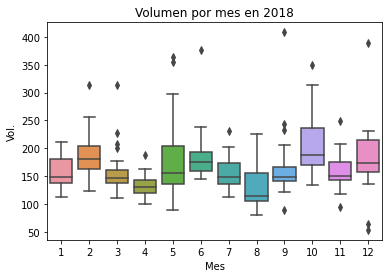

In [472]:
sns.boxplot(x=ibex['2018']['Mes'],
            y=ibex['2018']['Vol.'])
plt.title('Volumen por mes en 2018');

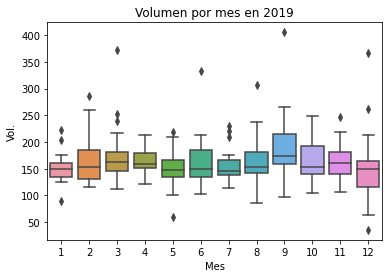

In [473]:
sns.boxplot(x=ibex['2019']['Mes'],
            y=ibex['2019']['Vol.'])
plt.title('Volumen por mes en 2019');

# Zona de pruebas

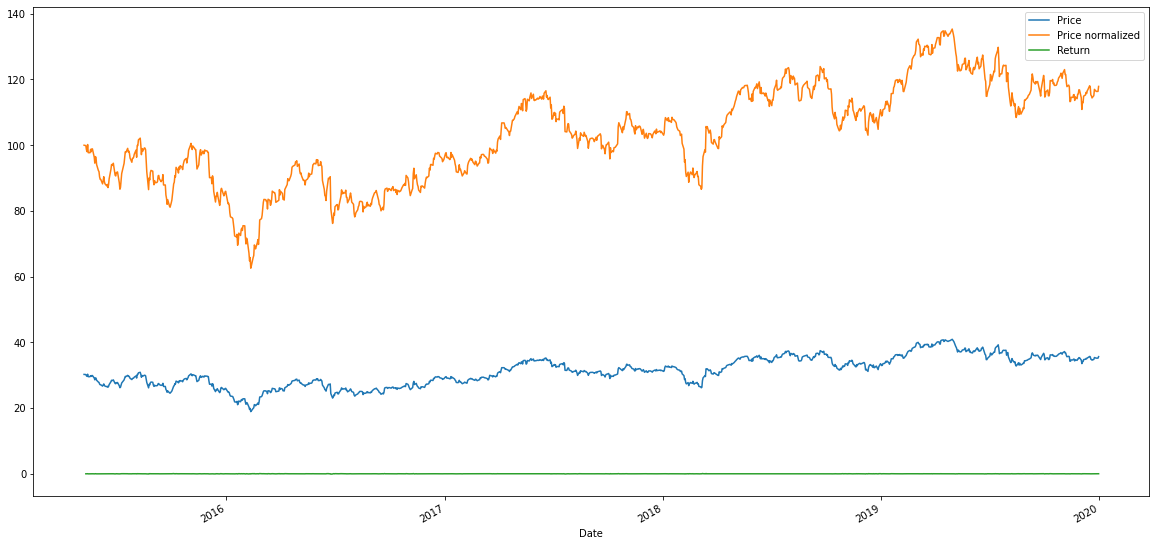

In [31]:
# Plot Price, Return y PriceN
ACS['Price'].plot(label='Price', figsize=(20,10))
ACS['PriceN'].plot(label='Price normalized', figsize=(20,10))
ACS['Return'].plot(label='Return', figsize=(20,10))

plt.legend();

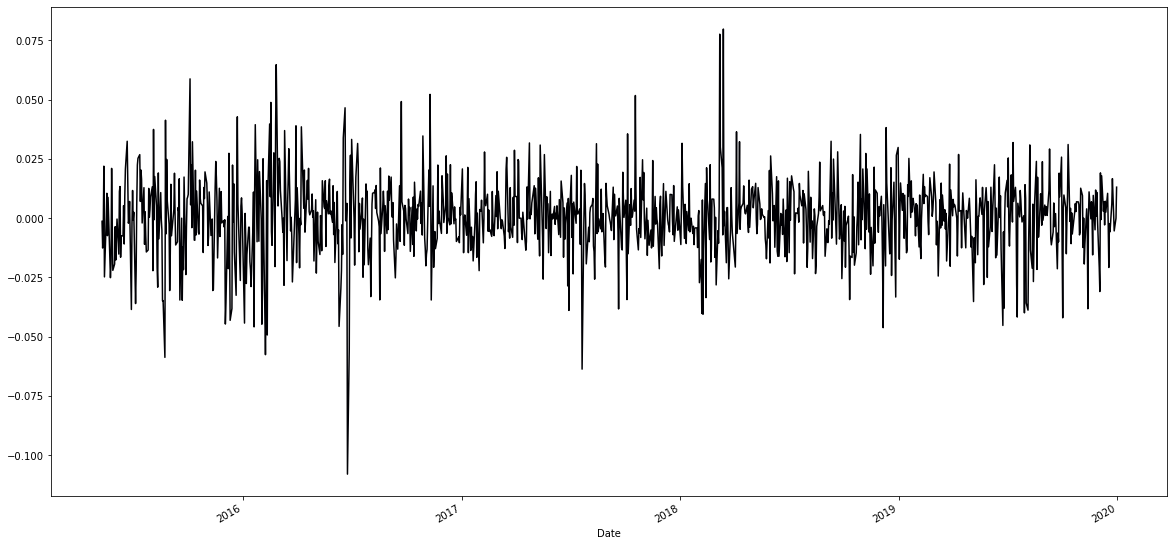

In [34]:
ACS['Return'].plot(label='Return', figsize=(20,10), colormap='magma');

In [4]:
#ibex['Open'] = ibex['Open'].str.replace(',','').astype(np.float64)

In [15]:
# Como evolucionaron estas relaciones en momentos claves: alguna crisis, fin de anio...
# Algunas empresas: energeticas, yo pienso a priori que en invierno subiran mas su valor

Price       256
Open        256
High        256
Low         256
Vol.        256
Change %    256
dtype: int64

In [5]:
# TRENDS

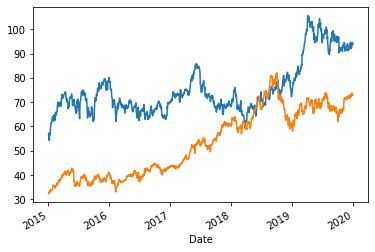

In [62]:
ANA['Price'].plot()
AMA['Price'].plot();

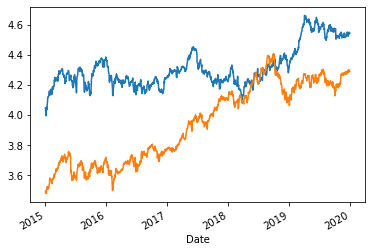

In [63]:
np.log(ANA['Price']).plot()
np.log(AMA['Price']).plot();

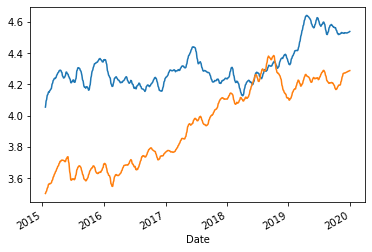

In [64]:
np.log(ANA['Price']).rolling(12).mean().plot()
np.log(AMA['Price']).rolling(12).mean().plot();

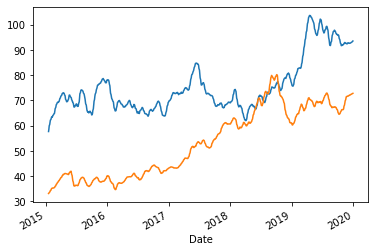

In [65]:
# Pruebo el rollback, el cual suaviza el ruido y
# la estacionalidad
tmp1 = ANA['Price'].rolling(12).mean()
tmp2 = AMA['Price'].rolling(12).mean()

tmp1.plot()
tmp2.plot();

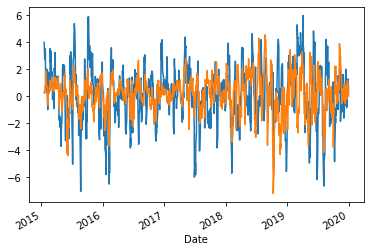

In [66]:
# Eliminando trend
ANA['No trend Price'] = ANA['Price'] - tmp1
AMA['No trend Price'] = AMA['Price'] - tmp2

ANA['No trend Price'].plot()
AMA['No trend Price'].plot();

In [67]:
# y con RETURN en lugar de Price?
ANA['Return'] = ANA['Price'].pct_change()
AMA['Return'] = AMA['Price'].pct_change()

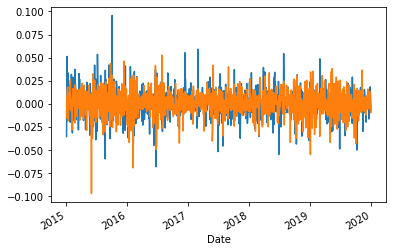

In [68]:
ANA['Return'].plot()
AMA['Return'].plot();

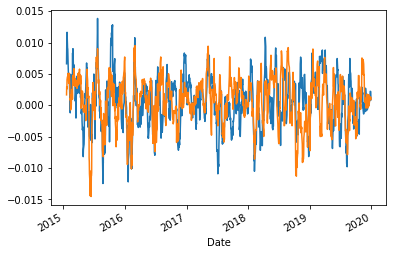

In [69]:
# y ahora sin su estacionalidad

tmp3 = ANA['Return'].rolling(12).mean()
tmp4 = AMA['Return'].rolling(12).mean()

tmp3.plot()
tmp4.plot();

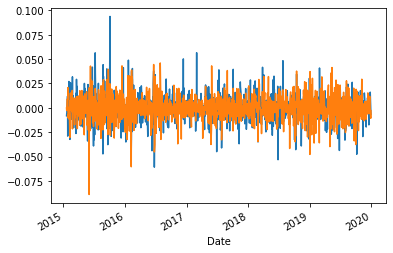

In [70]:
# Eliminando trend
ANA['No trend Return'] = ANA['Return'] - tmp3
AMA['No trend Return'] = AMA['Return'] - tmp4

ANA['No trend Return'].plot()
AMA['No trend Return'].plot();

In [71]:
# SEASONALITY

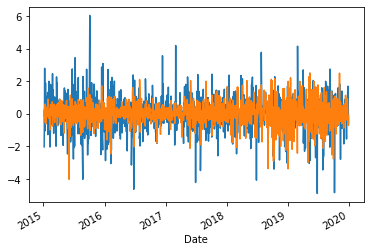

In [72]:
# Tecnica de diferenciacion
ANA['Price'].diff().plot()
AMA['Price'].diff().plot();

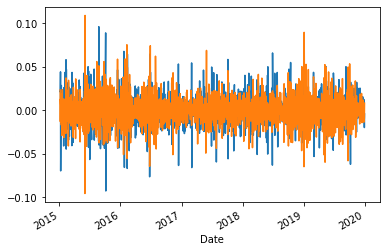

In [73]:
ANA['Return'].diff().plot()
AMA['Return'].diff().plot();

In [74]:
# Comprobando la correlacion cuando TREND esta
# eliminada
ANA['No trend Price'].corr(AMA['No trend Price'] )

0.3416470208867754

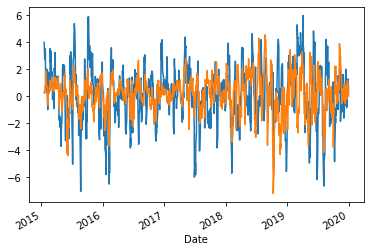

In [75]:
ANA['No trend Price'].plot()
AMA['No trend Price'].plot();

In [76]:
ANA['No trend Return'].corr(AMA['No trend Return'] )

0.3688764012938545

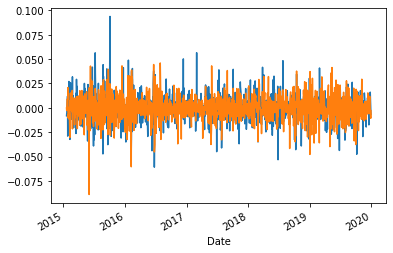

In [77]:
ANA['No trend Return'].plot()
AMA['No trend Return'].plot();

In [78]:
# TRABAJANDO CON TODAS

In [79]:
for c in my_comp:
    c['Return'] = c['Price'].pct_change()
    c['No trend Return'] = c['Return'] - c['Return'].rolling(12).mean()



In [80]:
t = len(my_comp_names)
dist_inter_emp = np.zeros((t,t))
dist_inter_emp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
for k1,v1 in enumerate(my_comp):
    for k2,v2 in enumerate(my_comp):
        #dist_inter_emp[k1,k2] = fastdtw(v1['OpenN'], v2['OpenN'])[0]
        dist_inter_emp[k1, k2] = v1['No trend Return'].corr(v2['No trend Return'])

# Crea el df con la matriz de correlaciones y filas, columnas = nombre empresas
df_distancias = pd.DataFrame(dist_inter_emp, columns=my_comp_names, index=my_comp_names)

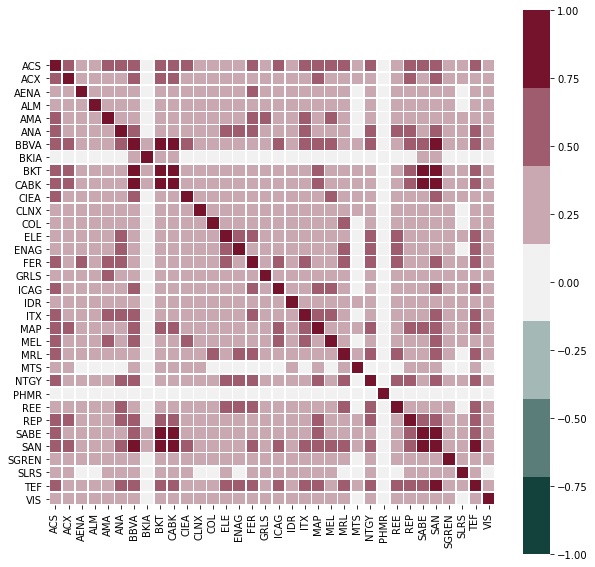

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(df_distancias,
            #cmap="vlag",
            cmap=sns.diverging_palette(180, 3, s=85, l=25, n=7),
            annot=False, linewidths=.5,
           square=True, vmin=-1.0, vmax=1.0);

In [83]:
# Y el return sin eliminarle el trend?

for k1,v1 in enumerate(my_comp):
    for k2,v2 in enumerate(my_comp):
        dist_inter_emp[k1, k2] = v1['Return'].corr(v2['Return'])

# Crea el df con la matriz de correlaciones y filas, columnas = nombre empresas
df_distancias = pd.DataFrame(dist_inter_emp, columns=my_comp_names, index=my_comp_names)

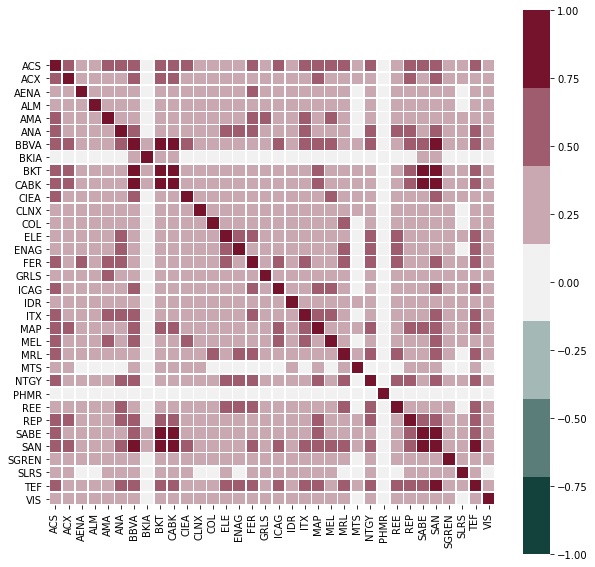

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df_distancias,
            #cmap="vlag",
            cmap=sns.diverging_palette(180, 3, s=85, l=25, n=7),
            annot=False, linewidths=.5,
           square=True, vmin=-1.0, vmax=1.0);

In [409]:
#!pip install venn

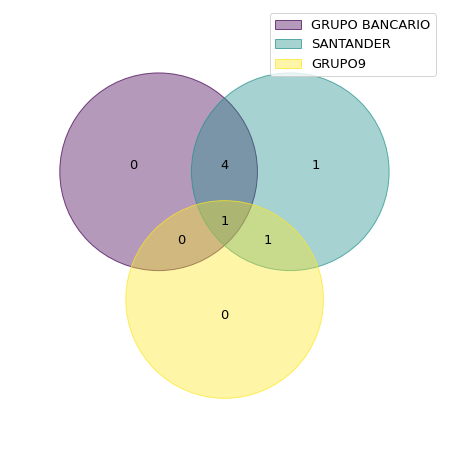

In [474]:
import venn
foo = {'GRUPO BANCARIO': {'SABE', 'CABK', 'BKT', 'BBVA', 'SAN'},
#'GRUPO6': {'ENAG', 'REE'},
#'GRUPO5': {'MAP', 'SAN'},
'SANTANDER': {'MAP', 'SABE', 'CABK', 'BKT', 'TEF', 'BBVA', 'SAN'},
'GRUPO9': {'TEF', 'SAN'}}

venn.venn(foo);